# Scope :

Given the tweets from twitter from several geographic zones find whether each tweet is related actual NATURAL DISASTER or Not

## What we're going to cover

Let's get specific 

* Downloading a text dataset
* Visualizing text data
* Converting text into numbers using tokenization
* Turning our tokenized text into an embedding
* Modelling a text dataset
  * Starting with a baseline (TF-IDF)
  * Building several deep learning text models
    * Dense, LSTM, GRU, Conv1D, Transfer learning
* Comparing the performance of each our models
* Combining our models into an ensemble
* Saving and loading a trained model
* Find the most wrong predictions


# Downloading dataset 

In [4]:
!wget "https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip"


--2022-10-11 23:44:30--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.62.128, 172.253.115.128, 172.253.122.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.62.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.004s  

2022-10-11 23:44:30 (129 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



In [5]:
# We have created some useful functions already as a script . We can download that also

!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

#import functions 

from helper_functions import unzip_data, create_tensorboard_callback, plot_loss_curves, compare_historys

--2022-10-11 23:44:32--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-10-11 23:44:32 (98.1 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [6]:
# Unzip the dataset 

unzip_data("nlp_getting_started.zip")

# Explore the Dataset 

VISUALISE ViSUALISE VISUALISE

In [7]:
# Load the data
import pandas as pd

train_df  = pd.read_csv("/content/train.csv")
test_df = pd.read_csv( "/content/test.csv")

In [8]:
train_df.head(5)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


* column text is the important feature 
* column  target is the label

## Datset basic check


In [9]:
# Check how many unique target values 
train_df.target.nunique()


# It is 2 hence it is going to either DISASTAER OR NO DISASTER 

# Many to one sequence 

2

In [10]:
# How many examples of each class?
train_df.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

 We see that out of all records 60% belongs to the  class 0 (NO DISASTER) , 40 %  belongs to the DISATER class . 
 
🤩 TRAINING DATA IS NOT BIASED

In [11]:
# How many samples total?
print(f"Total training samples: {len(train_df)}")
print(f"Total test samples: {len(test_df)}")
print(f"Total samples: {len(train_df) + len(test_df)}")

Total training samples: 7613
Total test samples: 3263
Total samples: 10876


😎 We have fair amount of training data in comparision to the test data  We have fair amount of training data in comparision to the test data 

## Randomised visual


In [12]:
# Lets try to print random five records after shuffling the dataframe records 

df = train_df.sample(frac=1, random_state=42)
df.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [13]:
from random import randint
r_index = randint(1,len(df)-5)
df.iloc[r_index:r_index+5]

,id,keyword,location,text,target
5190,7410,obliterated,Tennessee,WACKOES like #MicheleBachman predict the WORLD...,0
5784,8253,rioting,Vidalia GA,@Reuters people like you should be charged aft...,0
4369,6206,hijacker,NaN,Remove the http://t.co/2nS5TfnxpA and Linkury ...,0
6556,9380,survived,Bulgaria,Cute &amp; all livin' the life then you zoom i...,0
835,1213,blizzard,"Washington, USA",@Blizzard_draco @LoneWolffur also me please I ...,0


In [14]:
for i in range(5):
  r_index = randint(1,len(df))
  print(f" {'DISASTAER' if df.loc[r_index].target else 'NO DISASTER'} {df.loc[r_index].text}   \n {20*'*'} ")

 DISASTAER Choking Hazard Prompts Recall Of Kraft Cheese Singles http://t.co/nJLqRqcnL9   
 ******************** 
 NO DISASTER I burned myself today on the oven ?? it was at 500 degrees ??   
 ******************** 
 NO DISASTER Episcopal priests on road trip with interracial family shares harrowing story of police harassment http://t.co/RG4JIsHyBs via @dailykos   
 ******************** 
 NO DISASTER Electricity cant stop scofield. Nigga survived a hotbox in SONA   
 ******************** 
 DISASTAER #pakistan#news# PAKPATTAN City News: Man electrocuted From Our Correspondent PAKPATTAN: A man was electrocuted... http://t.co/frpbNhVPyI   
 ******************** 


<h1 style="color:blue">Observation from exploration</h1>

* LABEL target (Dependent variable) is numeric 
* FEATURE text (Independent variable) is combination of word (many sequence, each word is a sequence)
* Feature ID , keyword , location is not usefule , hence we can drop it

# Process in converting sequence of text to numbers 



## Split the data into training and validtion



In [15]:
import sklearn 
from sklearn.model_selection import train_test_split as tts

In [16]:
# we will use the randomised training df as input
train_sentences, val_sentences, train_labels, val_labels  =  tts(df['text'].to_numpy(),df['target'].to_numpy(),test_size=0.1, random_state=42)

In [17]:
# Check the lengths
len(train_sentences), len(train_labels), len(val_sentences), len(val_labels)


(6851, 6851, 762, 762)

In [18]:
# View the first 10 training sentences and their labels
train_sentences[:10], train_labels[:10]

(array(['@mogacola @zamtriossu i screamed after hitting tweet',
        'Imagine getting flattened by Kurt Zouma',
        '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
        "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
        'Somehow find you and I collide http://t.co/Ee8RpOahPk',
        '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
        'destroy the free fandom honestly',
        'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
        '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
        'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
       dtype=object), array([0, 

## LinkedIn Learning Summary


### Pre-processing text data

Cleaning up the text data is necessary to highlight attributes that you're going to want your machine learning system to pick up on. Cleaning (or pre-processing) the data typically consists of a number of steps:
1. **Remove punctuation**  - Removing symbols in the sentence
2. **Tokenization** - spliting each word in the sentence and forming as a list of strings
3. **Remove stopwords** - Remove the words like 'the' , 'for' etc . There is a corpus of stop words we can make use of them to filter the stop words
4. **Lemmatize/Stem** - reduce the word to its base form  (eg) runs, running, ran are all forms of the word run, therefore run is the lemma of all these words.

## converting text to number


In [19]:
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization
# Note: in TensorFlow 2.6+, you no longer need "layers.experimental.preprocessing"
# you can use: "tf.keras.layers.TextVectorization", see https://github.com/tensorflow/tensorflow/releases/tag/v2.6.0 for more

# Use the default TextVectorization variables
text_vectorizer = TextVectorization(max_tokens=None, # how many words in the vocabulary (all of the different words in your text)
                                    standardize="lower_and_strip_punctuation", # how to process text
                                    split="whitespace", # how to split tokens
                                    ngrams=None, # create groups of n-words?
                                    output_mode="int", # how to map tokens to numbers
                                    output_sequence_length=None) # how long should the output sequence of tokens be?
                                    # pad_to_max_tokens=True) # Not valid if using max_tokens=None

To vectorise we need to undeerstand few more details inside the sentence

---



1.   How may words in each message
2.   How many total words --> This forms the vocabulary
3.   Unique words --> Vcabulary without duplicate (MORE standard - Better to remove lemmatized words)
4.   Average words per tweet  -- This helps to decide the shape of feature vector (output_sequence_length)





In [20]:
# Tokenise 
res = train_sentences[0].split()
print(res)
len_list = [len(i.split()) for i in train_sentences]
len_list[:5]

['@mogacola', '@zamtriossu', 'i', 'screamed', 'after', 'hitting', 'tweet']


[7, 6, 20, 12, 7]

In [21]:

custom_voc =[]
for i in train_sentences:
  list_of_words = i.lower().split()
  for each_word in list_of_words:
    custom_voc.append(each_word)

# print(len (custom_voc), custom_voc)
print('The unique words in vocab : ', len(set(custom_voc)),'\nThe vocabulary : ' , set(custom_voc))

The unique words in vocab :  25888 
The vocabulary :  {'wtf?', 'storm-free', 'vegetables', "@cecanf's", 'could', 'multidimensional', 'http://t.co/wox3vprixq', 'away...', 'paul:', 'http://t.co/vjbhxn9x1o', 'lga.', 'jasmine', '#forbesasia', 'omfg....', 'parched', 'no.', '@originalfunko', 'life....', 'places.', 'http://t.co/b6nphxorzg', 'eheks', '#becarefulharry', 'measurement', 'burglar.', 'https://t.co/6ysxghc8gz', 'base.', 'them.', 'while.', 'tower\x89ûª', 'achievement', 'http://t.co/xehwmsh7lv', "'taking'", 'charged', 'day.http://t.co/8vzl1ns2io', 'comp', 'http://t.co/sqgogj3s5r.', '#cogxbox', '29', 'including', 'rihanna', 'impact...', 'work', 'moves', 'hundred-odd', 'radiation.', 'zotar(50', 'over...zero', '#childhooddefined', 'daisy', 'day', '#nashvilletraffic.', 'wastelands', 'http://t.co/jqxm4gcqz3', '#charmed', 'cuties', "twilight's", 'eyes*', 'judgement', "ldnr-terrorists'", 'notorious', '#ayekoradio', 'blowers', 'http://t.co/u2kwof3wtj', 'feels', '@canonusaimaging', 'anti', 'yo

In [22]:
# Find the total of words 
print('The total words in tweets : ',len(custom_voc))

The total words in tweets :  102087


In [23]:
len(custom_voc)/len(set(custom_voc))

3.9434100741656364

In [24]:
# Average word per tweet

avg_words_per_tweet = len(custom_voc)/len(train_sentences)
print('Average per tweet : ', avg_words_per_tweet)

Average per tweet :  14.901036345059115


## To identify how much unique words in Vocabulary

In [25]:
# Lets create our own text vectoriser --> Changing the parameters 

import tensorflow as tf
from tensorflow.keras.layers import TextVectorization
# Note: in TensorFlow 2.6+, you no longer need "layers.experimental.preprocessing"
# you can use: "tf.keras.layers.TextVectorization", see https://github.com/tensorflow/tensorflow/releases/tag/v2.6.0 for more

# Use the default TextVectorization variables
text_vectorizer = TextVectorization(max_tokens=None, # how many words in the vocabulary (all of the different words in your text)
                                    standardize="lower_and_strip_punctuation", # how to process text
                                    split="whitespace", # how to split tokens
                                    ngrams=None, # create groups of n-words?
                                    output_mode="int", # how to map tokens to numbers
                                    output_sequence_length=15) # how long should the output sequence of tokens be?
                                    # pad_to_max_tokens=True) # Not valid if using max_tokens=None

In [26]:
text_vectorizer.adapt(train_sentences)

In [27]:
len(text_vectorizer.get_vocabulary())

21056

😶 **Note**:

1.   If you see the content of vocabulary --> 21056 
2.   From our earlier function function --> 25888 

The reason for the diffference is the text_vectorizer does removing punctuation 



In [28]:
max_vocab_limit = 10000   # From vocab length . Just reduced half of it
max_feature_vector_length = 15  # From avg words count

In [29]:
text_vectorizer = TextVectorization(max_tokens=max_vocab_limit, # how many words in the vocabulary (all of the different words in your text)
                                    standardize="lower_and_strip_punctuation", # how to process text
                                    split="whitespace", # how to split tokens
                                    ngrams=None, # create groups of n-words?
                                    output_mode="int", # how to map tokens to numbers
                                    output_sequence_length=max_feature_vector_length) # how long should the output sequence of tokens be?
                                    # pad_to_max_tokens=True) # Not valid if using max_tokens=None

In [30]:
text_vectorizer.adapt(train_sentences)

Training data mapped! Let's try our `text_vectorizer` on a custom sentence (one similar to what you might see in the training data).

In [31]:
# Create sample sentence and tokenize it
sample_sentence = "There's a flood in my street!"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[264,   3, 232,   4,  13, 698,   0,   0,   0,   0,   0,   0,   0,
          0,   0]])>

Wonderful, it seems we've got a way to turn our text into numbers (in this case, word-level tokenization). Notice the 0's at the end of the returned tensor, this is because we set `output_sequence_length=15`, meaning no matter the size of the sequence we pass to `text_vectorizer`, it always returns a sequence with a length of 15.

How about we try our `text_vectorizer` on a few random sentences?

In [32]:
# Choose a random sentence from the training dataset and tokenize it
import random 
random_sentence = random.choice(train_sentences)
print(f"Original text:\n{random_sentence}\
      \n\nVectorized version:")
text_vectorizer([random_sentence])

Original text:
GOP debate drinking game. For anyone looking for a bit of fun while watching this train wreck. http://t.co/W3Rga0nkOm http://t.co/0TZsQe8ESD      

Vectorized version:


<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[1016, 2142, 1687,  397,   10,  864,  884,   10,    3, 1322,    6,
         604,  211,  636,   19]])>

In [33]:
# Choose a random sentence from the training dataset and tokenize it
random_sentence = random.choice(train_sentences)
print(f"Original text:\n{random_sentence}\
      \n\nVectorized version:")
text_vectorizer([random_sentence])

Original text:
Review: Dude Bro Party Massacre III http://t.co/f0WQlobOoy by Patrick BromleyThe title sa  http://t.co/THpBDPdj35      

Vectorized version:


<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[1608, 1087, 1709, 1116,  344, 2425,    1,   18, 2358,    1, 2256,
        2725,    1,    0,    0]])>

Looking good!

Finally, we can check the unique tokens in our vocabulary using the `get_vocabulary()` method.

In [34]:
# Choose a random sentence from the training dataset and tokenize it
random_sentence = random.choice(train_sentences)
print(f"Original text:\n{random_sentence}\
      \n\nVectorized version:")
text_vectorizer([random_sentence])

Original text:
@Haley_Whaley Hailstorm Hey There is a Secret Trick to get 375.000 Gems Clash ofClans check them now on my Profile      

Vectorized version:


<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[   1,  818,  706,   74,    9,    3, 1060, 4377,    5,   52,    1,
         948, 3107,    1,  256]])>

In [35]:
vocab = text_vectorizer.get_vocabulary()
len(vocab)

10000

In [36]:
# Top 10 words in vocab - Vocabulay is in the order of Descending by menas of frequency  of the word 

vocab[:10]

['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is']

The ' ' is the space 

The [UNK] is any word outside the 10k vocab

## Embedding 

In [37]:
embed_data = tf.keras.layers.Embedding(input_dim = max_vocab_limit, 
                                       output_dim = 128 , # Each word or token will be converted to 128 feature vector
                                       input_length = max_feature_vector_length, 
                                       embeddings_initializer = 'uniform')


In [38]:
print(train_sentences[0])
print(text_vectorizer(train_sentences[0]))

# we must pass the tokenized array as input to the embedding layer 
embed_data(text_vectorizer(train_sentences[0]))

@mogacola @zamtriossu i screamed after hitting tweet
tf.Tensor(
[   1 6507    8  387   43 2956  978    0    0    0    0    0    0    0
    0], shape=(15,), dtype=int64)


<tf.Tensor: shape=(15, 128), dtype=float32, numpy=
array([[ 0.03108108,  0.0483014 , -0.02341821, ...,  0.02147492,
         0.0143255 , -0.03508329],
       [ 0.00993484,  0.04584013, -0.03430346, ...,  0.03721137,
         0.02070036, -0.0176459 ],
       [ 0.01213434,  0.01249254, -0.04659402, ..., -0.0103521 ,
        -0.01729554, -0.01492492],
       ...,
       [ 0.03315261, -0.00405188,  0.04512391, ...,  0.01825261,
         0.0327317 , -0.00693029],
       [ 0.03315261, -0.00405188,  0.04512391, ...,  0.01825261,
         0.0327317 , -0.00693029],
       [ 0.03315261, -0.00405188,  0.04512391, ...,  0.01825261,
         0.0327317 , -0.00693029]], dtype=float32)>

# Modelling

## Model 0 : Baseline

Not a deep learning model - sklearn - naive bayes 

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# Create tokenization and modelling pipeline
model_0 = Pipeline([
                    ("tfidf", TfidfVectorizer()), # convert words to numbers using tfidf
                    ("clf", MultinomialNB()) # model the text
])

# Fit the pipeline to the training data
model_0.fit(train_sentences, train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

The benefit of using a shallow model like Multinomial Naive Bayes is that training is very fast.

Let's evaluate our model and find our baseline metric.

In [40]:
baseline_score = model_0.score(val_sentences, val_labels)
print(f"Our baseline model achieves an accuracy of: {baseline_score*100:.2f}%")

Our baseline model achieves an accuracy of: 79.27%


In [41]:
baseline_preds =model_0.predict(val_sentences)

In [42]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  """
  Calculates model accuracy, precision, recall and f1 score of a binary classification model.

  Args:
  -----
  y_true = true labels in the form of a 1D array
  y_pred = predicted labels in the form of a 1D array

  Returns a dictionary of accuracy, precision, recall, f1-score.
  """
  # Calculate model accuracy
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  # Calculate model precision, recall and f1 score using "weighted" average
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {"accuracy": model_accuracy,
                  "precision": model_precision,
                  "recall": model_recall,
                  "f1": model_f1}
  return model_results

In [43]:
# Get baseline results
baseline_results = calculate_results(y_true=val_labels,
                                     y_pred=baseline_preds)
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

## Model 1 : Feed Forward Neural Network 

In [44]:
# Need a tensor board callback 
from helper_functions import create_tensorboard_callback

# create directory for tensorboard logs
SAVE_DIR = "model_logs"


In [45]:
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype="string") # inputs are 1-dimensional strings
x = text_vectorizer(inputs) # turn the input text into numbers
x = embed_data(x) # create an embedding of the numerized numbers
x = layers.GlobalAveragePooling1D()(x) # lower the dimensionality of the embedding (try running the model without this layer and see what happens)
outputs = layers.Dense(1, activation="sigmoid")(x) # create the output layer, want binary outputs so use sigmoid activation
model_1 = tf.keras.Model(inputs, outputs, name="model_1_dense") # construct the model

In [46]:
# Compile model
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

Model compiled. Let's get a summary.

In [47]:
# Get a summary of the model
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_2 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
N

In [48]:
# Fit the model
model_1_history = model_1.fit(train_sentences, # input sentences can be a list of strings due to text preprocessing layer built-in model
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR, 
                                                                     experiment_name="simple_dense_model")])

Saving TensorBoard log files to: model_logs/simple_dense_model/20221011-234438
Epoch 1/5
215/215 [==============================] - 4s 17ms/step - loss: 0.6105 - accuracy: 0.6892 - val_loss: 0.5337 - val_accuracy: 0.7546
Epoch 2/5
215/215 [==============================] - 5s 24ms/step - loss: 0.4409 - accuracy: 0.8186 - val_loss: 0.4713 - val_accuracy: 0.7848
Epoch 3/5
215/215 [==============================] - 5s 25ms/step - loss: 0.3470 - accuracy: 0.8612 - val_loss: 0.4638 - val_accuracy: 0.7913
Epoch 4/5
215/215 [==============================] - 4s 20ms/step - loss: 0.2840 - accuracy: 0.8902 - val_loss: 0.4648 - val_accuracy: 0.7913
Epoch 5/5
215/215 [==============================] - 4s 20ms/step - loss: 0.2370 - accuracy: 0.9111 - val_loss: 0.4804 - val_accuracy: 0.7861


Nice! Since we're using such a simple model, each epoch processes very quickly.

Let's check our model's performance on the validation set.

In [49]:
# Check the results
model_1.evaluate(val_sentences, val_labels)

24/24 [==============================] - 0s 2ms/step - loss: 0.4804 - accuracy: 0.7861


[0.48035725951194763, 0.7860892415046692]

In [50]:
embed_data.weights

[<tf.Variable 'embedding/embeddings:0' shape=(10000, 128) dtype=float32, numpy=
 array([[ 0.03857811, -0.03012723,  0.07159723, ...,  0.04456524,
          0.05974882,  0.0171488 ],
        [ 0.0114434 ,  0.0404595 , -0.01747427, ...,  0.02943854,
          0.02035178, -0.03065283],
        [-0.04388245, -0.0203534 ,  0.03653584, ..., -0.03055578,
          0.01782034,  0.04028186],
        ...,
        [-0.04266021, -0.02042344, -0.00818356, ..., -0.03190645,
          0.0299942 , -0.03341208],
        [ 0.01042144, -0.08485665,  0.08092786, ...,  0.08148081,
          0.0099871 ,  0.05563413],
        [ 0.09177347, -0.05556038,  0.03452361, ...,  0.03615715,
          0.08164331,  0.10375369]], dtype=float32)>]

In [51]:
embed_weights = model_1.get_layer(model_1.layers[2].name).get_weights()[0]
print(embed_weights.shape)

(10000, 128)


In [52]:
# # View tensorboard logs of transfer learning modelling experiments (should be 4 models)
# Upload TensorBoard dev records
# !tensorboard dev upload --logdir ./model_logs \
#   --name "First deep model on text data" \
#   --description "Trying a dense model with an embedding layer" \
#   --one_shot # exits the uploader when upload has finished

In [53]:
# Make predictions (these come back in the form of probabilities)
model_1_pred_probs = model_1.predict(val_sentences)
model_1_pred_probs[:10] # only print out the first 10 prediction probabilities

array([[0.3870536 ],
       [0.73164475],
       [0.99708045],
       [0.08638883],
       [0.09369549],
       [0.93234277],
       [0.9041121 ],
       [0.9939945 ],
       [0.96639407],
       [0.23058763]], dtype=float32)

In [54]:
model_1_preds = tf.squeeze(tf.round(model_1_pred_probs)) # squeeze removes single dimensions
model_1_preds[:20]

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1.], dtype=float32)>

In [55]:
# Calculate model_1 metrics
model_1_results = calculate_results(y_true=val_labels, 
                                    y_pred=model_1_preds)
model_1_results

{'accuracy': 78.60892388451444,
 'precision': 0.7920916944370863,
 'recall': 0.7860892388451444,
 'f1': 0.7827032509906072}

In [56]:
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

**Baseline > Model_1**

In [57]:
# Create a helper function to compare our baseline results to new model results
def compare_baseline_to_new_results(baseline_results, new_model_results):
  for key, value in baseline_results.items():
    print(f"Baseline {key}: {value:.2f}, New {key}: {new_model_results[key]:.2f}, Difference: {new_model_results[key]-value:.2f}")

compare_baseline_to_new_results(baseline_results=baseline_results, 
                                new_model_results=model_1_results)

Baseline accuracy: 79.27, New accuracy: 78.61, Difference: -0.66
Baseline precision: 0.81, New precision: 0.79, Difference: -0.02
Baseline recall: 0.79, New recall: 0.79, Difference: -0.01
Baseline f1: 0.79, New f1: 0.78, Difference: -0.00


## Visualizing learned embeddings

Our first model (`model_1`) contained an embedding layer (`embedding`) which learned a way of representing words as feature vectors by passing over the training data.

Hearing this for the first few times may sound confusing.

So to further help understand what a text embedding is, let's visualize the embedding our model learned.

To do so, let's remind ourselves of the words in our vocabulary.


In [58]:
# Get the vocabulary from the text vectorization layer
words_in_vocab = text_vectorizer.get_vocabulary()
len(words_in_vocab), words_in_vocab[:10]

(10000, ['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is'])

And now let's get our embedding layer's weights (these are the numerical representations of each word).

In [59]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_2 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
N

In [60]:
# Get the weight matrix of embedding layer 
# (these are the numerical patterns between the text in the training dataset the model has learned)
print(model_1.layers[2].name)
embed_weights = model_1.get_layer(model_1.layers[2].name).get_weights()[0]
print(embed_weights.shape) # same size as vocab size and embedding_dim (each word is a embedding_dim size vector)

embedding
(10000, 128)


Now we've got these two objects, we can use the [Embedding Projector tool](http://projector.tensorflow.org/_) to visualize our embedding. 

To use the Embedding Projector tool, we need two files:
* The embedding vectors (same as embedding weights).
* The meta data of the embedding vectors (the words they represent - our vocabulary).

Right now, we've got of these files as Python objects. To download them to file, we're going to [use the code example available on the TensorFlow word embeddings tutorial page](https://www.tensorflow.org/tutorials/text/word_embeddings#retrieve_the_trained_word_embeddings_and_save_them_to_disk).


In [61]:
# Code below is adapted from: https://www.tensorflow.org/tutorials/text/word_embeddings#retrieve_the_trained_word_embeddings_and_save_them_to_disk
# import io

# # Create output writers
# out_v = io.open("embedding_vectors.tsv", "w", encoding="utf-8")
# out_m = io.open("embedding_metadata.tsv", "w", encoding="utf-8")

# # Write embedding vectors and words to file
# for num, word in enumerate(words_in_vocab):
#   if num == 0: 
#      continue # skip padding token
#   vec = embed_weights[num]
#   out_m.write(word + "\n") # write words to file
#   out_v.write("\t".join([str(x) for x in vec]) + "\n") # write corresponding word vector to file
# out_v.close()
# out_m.close()

# # Download files locally to upload to Embedding Projector
# try:
#   from google.colab import files
# except ImportError:
#   pass
# else:
#   files.download("embedding_vectors.tsv")
#   files.download("embedding_metadata.tsv")

## Model 2 : LSTM 

In [62]:
from tensorflow.keras import layers

inputs = layers.Input(shape=(1,),dtype="string")

# Text vectorisation --. Converting from string to integers
# It takes only 10000 common words from all the twets and builds vocabulary
# Each tweet is represented as single vector (15 elements inside it)
m2_vectorizer = layers.TextVectorization(max_tokens=10000,
                                         output_sequence_length=15,
                                         output_mode='int')

# Fit the text vectorizer to the training text
m2_vectorizer.adapt(train_sentences)

x = m2_vectorizer(inputs)
print('The shape after vectorisation :', x.shape)

# Embedding the data --> Converting Integres to float 
# Each word or token will be represesnted as vector of specified length
m2_embedder = layers.Embedding(input_dim=10000,
                               output_dim=128,
                               input_length =15)
x = m2_embedder(x)
print('The shape after embedding :', x.shape)

# Long short term memory cell as layer
x = layers.LSTM(units=64,
                activation='tanh',
                recurrent_activation='sigmoid',
                )(x)

# Output layer
outputs = layers.Dense(1, activation='sigmoid')(x)

# Model
model_2=tf.keras.models.Model(inputs,outputs)


The shape after vectorisation : (None, 15)
The shape after embedding : (None, 15, 128)


In [63]:
model_2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_3 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding_1 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,329,473
Trainable params: 1,329,473
Non-trainable params: 0
___________________________________________________

In [64]:
model_2.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy']
                )

In [65]:
model_2_history = model_2.fit(x=train_sentences,
                              y=train_labels,
                              epochs=5,
                              batch_size=32,
                              validation_data = (val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR, 
                                                                     experiment_name="LSTM")]
                              
                              )

Saving TensorBoard log files to: model_logs/LSTM/20221011-234522
Epoch 1/5
215/215 [==============================] - 9s 31ms/step - loss: 0.5084 - accuracy: 0.7491 - val_loss: 0.4647 - val_accuracy: 0.7835
Epoch 2/5
215/215 [==============================] - 7s 31ms/step - loss: 0.3136 - accuracy: 0.8717 - val_loss: 0.5015 - val_accuracy: 0.7795
Epoch 3/5
215/215 [==============================] - 6s 29ms/step - loss: 0.2141 - accuracy: 0.9186 - val_loss: 0.5604 - val_accuracy: 0.7822
Epoch 4/5
215/215 [==============================] - 6s 29ms/step - loss: 0.1560 - accuracy: 0.9441 - val_loss: 0.6616 - val_accuracy: 0.7730
Epoch 5/5
215/215 [==============================] - 7s 32ms/step - loss: 0.1073 - accuracy: 0.9620 - val_loss: 0.8019 - val_accuracy: 0.7546


In [66]:
model_2.evaluate(val_sentences, val_labels)

24/24 [==============================] - 0s 5ms/step - loss: 0.8019 - accuracy: 0.7546


[0.8018968105316162, 0.7545931935310364]

In [67]:
model_2_pred_probs= model_2.predict(val_sentences)
model_2_pred_probs[:5]

array([[0.5555052 ],
       [0.9346634 ],
       [0.9997456 ],
       [0.15788162],
       [0.00151595]], dtype=float32)

In [68]:
# convert this to either o or 1 
# Round out predictions and reduce to 1-dimensional array
model_2_preds = tf.squeeze(tf.round(model_2_pred_probs))
model_2_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [69]:
model_2_results=calculate_results(val_labels,model_2_preds)

In [70]:
model_2_results

{'accuracy': 75.45931758530183,
 'precision': 0.7542851958949438,
 'recall': 0.7545931758530183,
 'f1': 0.7543752032864434}

In [71]:
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

In [72]:
compare_baseline_to_new_results(baseline_results=baseline_results,
                                new_model_results=model_2_results)

Baseline accuracy: 79.27, New accuracy: 75.46, Difference: -3.81
Baseline precision: 0.81, New precision: 0.75, Difference: -0.06
Baseline recall: 0.79, New recall: 0.75, Difference: -0.04
Baseline f1: 0.79, New f1: 0.75, Difference: -0.03


😪   Model_2< Baseline 

## Model 3 : GRU

In [73]:
# Gated recurrent units (GRUs).

inputs = layers.Input(shape=(1,),dtype='string')

# Text vectorisation --. Converting from string to integers
# It takes only 10000 common words from all the twets and builds vocabulary
# Each tweet is represented as single vector (15 elements inside it)
m3_vectorizer = layers.TextVectorization(max_tokens=10000,
                                         output_sequence_length=15,
                                         output_mode='int')

# Fit the text vectorizer to the training text
m3_vectorizer.adapt(train_sentences)

x = m3_vectorizer(inputs)
print('The shape after vectorisation :', x.shape)

# Embedding the data --> Converting Integres to float 
# Each word or token will be represesnted as vector of specified length
m3_embedder = layers.Embedding(input_dim=10000,
                               output_dim=128,
                               input_length =15)
x = m3_embedder(x)
print('The shape after embedding :', x.shape)

x = layers.GRU(units=64,
               activation='tanh',
               recurrent_activation='sigmoid',)(x)

outputs = layers.Dense(units=1, activation='sigmoid',)(x)

model_3 = tf.keras.models.Model(inputs,outputs)

model_3.summary()

The shape after vectorisation : (None, 15)
The shape after embedding : (None, 15, 128)
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_4 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding_2 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 gru (GRU)                   (None, 64)                37248     
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,317,313
Trainable para

In [74]:
model_3.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy']
                )


In [75]:
model_3_history = model_3.fit(x= train_sentences,
                              y=train_labels,
                              epochs=5,
                              validation_data=(val_sentences,val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR, 
                                                                     experiment_name="GRU model")])

Saving TensorBoard log files to: model_logs/GRU model/20221011-234606
Epoch 1/5
215/215 [==============================] - 9s 30ms/step - loss: 0.5326 - accuracy: 0.7259 - val_loss: 0.4622 - val_accuracy: 0.7861
Epoch 2/5
215/215 [==============================] - 6s 30ms/step - loss: 0.3186 - accuracy: 0.8667 - val_loss: 0.4753 - val_accuracy: 0.7769
Epoch 3/5
215/215 [==============================] - 7s 33ms/step - loss: 0.2195 - accuracy: 0.9178 - val_loss: 0.5742 - val_accuracy: 0.7585
Epoch 4/5
215/215 [==============================] - 7s 32ms/step - loss: 0.1547 - accuracy: 0.9464 - val_loss: 0.5609 - val_accuracy: 0.7703
Epoch 5/5
215/215 [==============================] - 6s 29ms/step - loss: 0.1138 - accuracy: 0.9634 - val_loss: 0.7011 - val_accuracy: 0.7769


In [76]:
model_3.evaluate(val_sentences,val_labels)

24/24 [==============================] - 0s 5ms/step - loss: 0.7011 - accuracy: 0.7769


[0.7010968327522278, 0.7769029140472412]

In [77]:
model_3_pred_probs = model_3.predict(val_sentences)

In [78]:
model_3_preds = tf.squeeze(tf.round(model_3_pred_probs),axis=1)

In [79]:
model_3_preds[:5
                ]

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([0., 1., 1., 0., 0.], dtype=float32)>

In [80]:
model_3_results = calculate_results(y_true = val_labels, y_pred = model_3_preds)

In [81]:
compare_baseline_to_new_results(baseline_results=baseline_results,
                                new_model_results=model_3_results)

Baseline accuracy: 79.27, New accuracy: 77.69, Difference: -1.57
Baseline precision: 0.81, New precision: 0.78, Difference: -0.03
Baseline recall: 0.79, New recall: 0.78, Difference: -0.02
Baseline f1: 0.79, New f1: 0.77, Difference: -0.01


>  😯 Model 3 < Baseline 

## Model 4 : Bidirectional Neural network

In [82]:
# Bidirectional Neural Network 

inputs = layers.Input(shape=(1,),dtype='string')

# Text vectorisation --. Converting from string to integers
# It takes only 10000 common words from all the twets and builds vocabulary
# Each tweet is represented as single vector (15 elements inside it)
m4_vectorizer = layers.TextVectorization(max_tokens=10000,
                                         output_sequence_length=15,
                                         output_mode='int')

# Fit the text vectorizer to the training text
m4_vectorizer.adapt(train_sentences)

x = m4_vectorizer(inputs)
print('The shape after vectorisation :', x.shape)

# Embedding the data --> Converting Integres to float 
# Each word or token will be represesnted as vector of specified length
m4_embedder = layers.Embedding(input_dim=10000,
                               output_dim=128,
                               input_length =15)
x = m4_embedder(x)
print('The shape after embedding :', x.shape)

x = layers.Bidirectional(layers.GRU(units=64,
               activation='tanh',
               recurrent_activation='sigmoid',))(x)

outputs = layers.Dense(units=1, activation='sigmoid',)(x)

model_4 = tf.keras.models.Model(inputs,outputs)

model_4.summary()

The shape after vectorisation : (None, 15)
The shape after embedding : (None, 15, 128)
Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_5 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding_3 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 bidirectional (Bidirectiona  (None, 128)              74496     
 l)                                                              
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                      

In [83]:
model_4.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy']
                )


In [84]:
model_4_history = model_4.fit(x= train_sentences,
                              y=train_labels,
                              epochs=5,
                              validation_data=(val_sentences,val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR, 
                                                                     experiment_name="Bidirectional Neural network")])

Saving TensorBoard log files to: model_logs/Bidirectional Neural network/20221011-234644
Epoch 1/5
215/215 [==============================] - 26s 93ms/step - loss: 0.5221 - accuracy: 0.7397 - val_loss: 0.4669 - val_accuracy: 0.7795
Epoch 2/5
215/215 [==============================] - 12s 55ms/step - loss: 0.3145 - accuracy: 0.8702 - val_loss: 0.4721 - val_accuracy: 0.7703
Epoch 3/5
215/215 [==============================] - 8s 39ms/step - loss: 0.2022 - accuracy: 0.9221 - val_loss: 0.5219 - val_accuracy: 0.7822
Epoch 4/5
215/215 [==============================] - 8s 39ms/step - loss: 0.1312 - accuracy: 0.9584 - val_loss: 0.6010 - val_accuracy: 0.7598
Epoch 5/5
215/215 [==============================] - 8s 37ms/step - loss: 0.1008 - accuracy: 0.9676 - val_loss: 0.7151 - val_accuracy: 0.7703


In [85]:
model_4.evaluate(val_sentences,val_labels)

24/24 [==============================] - 0s 6ms/step - loss: 0.7151 - accuracy: 0.7703


[0.7150512337684631, 0.7703412175178528]

In [86]:
model_4_pred_probs = model_4.predict(val_sentences)

In [87]:
model_4_preds = tf.squeeze(tf.round(model_3_pred_probs),axis=1)

In [88]:
model_4_preds[:5
                ]

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([0., 1., 1., 0., 0.], dtype=float32)>

In [89]:
model_4_results = calculate_results(y_true = val_labels, y_pred = model_3_preds)

In [90]:
compare_baseline_to_new_results(baseline_results=baseline_results,
                                new_model_results=model_4_results)

Baseline accuracy: 79.27, New accuracy: 77.69, Difference: -1.57
Baseline precision: 0.81, New precision: 0.78, Difference: -0.03
Baseline recall: 0.79, New recall: 0.78, Difference: -0.02
Baseline f1: 0.79, New f1: 0.77, Difference: -0.01


>  😯 Model 4 < Baseline 

## Model 5 : CNN

In [91]:
from tensorflow.keras import layers

inputs = layers.Input(shape=(1,),dtype='string')
x = text_vectorizer(inputs)
x = embed_data(x)
x = layers.Conv1D(filters=32,
                  kernel_size=5,
                  strides=1,
                  padding='same',
                  )(x)
x = layers.GlobalMaxPool1D()(x)
outputs = layers.Dense(1,activation='sigmoid')(x)
model_5 = tf.keras.models.Model(inputs,outputs)

In [92]:
model_5.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_2 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 conv1d (Conv1D)             (None, 15, 32)            20512     
                                                                 
 global_max_pooling1d (Globa  (None, 32)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense_4 (Dense)             (None, 1)                 33  

In [93]:
model_5.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy']
                )

In [94]:
model_5_history = model_5.fit(x= train_sentences,
                              y=train_labels,
                              epochs=5,
                              validation_data=(val_sentences,val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR, 
                                                                     experiment_name="CNN_model")])

Saving TensorBoard log files to: model_logs/CNN_model/20221011-234749
Epoch 1/5
215/215 [==============================] - 5s 21ms/step - loss: 0.2300 - accuracy: 0.9136 - val_loss: 0.5573 - val_accuracy: 0.7835
Epoch 2/5
215/215 [==============================] - 7s 31ms/step - loss: 0.1672 - accuracy: 0.9367 - val_loss: 0.6211 - val_accuracy: 0.7848
Epoch 3/5
215/215 [==============================] - 5s 24ms/step - loss: 0.1307 - accuracy: 0.9504 - val_loss: 0.6591 - val_accuracy: 0.7808
Epoch 4/5
215/215 [==============================] - 5s 23ms/step - loss: 0.1032 - accuracy: 0.9622 - val_loss: 0.7501 - val_accuracy: 0.7756
Epoch 5/5
215/215 [==============================] - 4s 21ms/step - loss: 0.0828 - accuracy: 0.9693 - val_loss: 0.8128 - val_accuracy: 0.7730


In [95]:
model_5.evaluate(val_sentences,val_labels)

24/24 [==============================] - 0s 3ms/step - loss: 0.8128 - accuracy: 0.7730


[0.8127617835998535, 0.7729659080505371]

In [96]:
model_5_pred_probs = model_5.predict(val_sentences)

In [97]:
model_5_preds = tf.squeeze(tf.round(model_3_pred_probs),axis=1)

In [98]:
model_5_preds[:5
                ]

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([0., 1., 1., 0., 0.], dtype=float32)>

In [99]:
model_5_results = calculate_results(y_true = val_labels, y_pred = model_3_preds)

In [100]:
compare_baseline_to_new_results(baseline_results=baseline_results,
                                new_model_results=model_5_results)

Baseline accuracy: 79.27, New accuracy: 77.69, Difference: -1.57
Baseline precision: 0.81, New precision: 0.78, Difference: -0.03
Baseline recall: 0.79, New recall: 0.78, Difference: -0.02
Baseline f1: 0.79, New f1: 0.77, Difference: -0.01


>  😯 Model 5 < Baseline 

## Model 6 

In [101]:
import tensorflow_hub as hub

embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
embeddings = embed([
    "The quick brown fox jumps over the lazy dog.",
    "I am a sentence for which I would like to get its embedding"])

print(embeddings)

tf.Tensor(
[[-0.03133017 -0.06338634 -0.01607501 ... -0.03242778 -0.0457574
   0.05370456]
 [ 0.05080861 -0.01652434  0.01573779 ...  0.00976657  0.03170121
   0.01788118]], shape=(2, 512), dtype=float32)


In [102]:
import tensorflow as tf
# We can use this encoding layer in place of our text_vectorizer and embedding layer
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape=[], # shape of inputs coming to our model 
                                        dtype=tf.string, # data type of inputs coming to the USE layer
                                        trainable=False, # keep the pretrained weights (we'll create a feature extractor)
                                        name="USE")

In [103]:
# Create model using the Sequential API
from tensorflow.keras import layers
model_6 = tf.keras.Sequential([
  sentence_encoder_layer, # take in sentences and then encode them into an embedding
  layers.Dense(64, activation="relu"),
  layers.Dense(1, activation="sigmoid")
], name="model_6_USE")

# Compile model
model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_6.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_5 (Dense)             (None, 64)                32832     
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [104]:
# Train a classifier on top of pretrained embeddings
model_6_history = model_6.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, 
                                                                     "tf_hub_sentence_encoder")])

Saving TensorBoard log files to: model_logs/tf_hub_sentence_encoder/20221011-234855
Epoch 1/5
215/215 [==============================] - 7s 15ms/step - loss: 0.5004 - accuracy: 0.7869 - val_loss: 0.4527 - val_accuracy: 0.7927
Epoch 2/5
215/215 [==============================] - 3s 12ms/step - loss: 0.4135 - accuracy: 0.8136 - val_loss: 0.4463 - val_accuracy: 0.8097
Epoch 3/5
215/215 [==============================] - 3s 13ms/step - loss: 0.4012 - accuracy: 0.8206 - val_loss: 0.4310 - val_accuracy: 0.8150
Epoch 4/5
215/215 [==============================] - 2s 12ms/step - loss: 0.3913 - accuracy: 0.8276 - val_loss: 0.4308 - val_accuracy: 0.8163
Epoch 5/5
215/215 [==============================] - 3s 12ms/step - loss: 0.3850 - accuracy: 0.8326 - val_loss: 0.4296 - val_accuracy: 0.8123


In [105]:
# Make predictions with USE TF Hub model
model_6_pred_probs = model_6.predict(val_sentences)
model_6_pred_probs[:10]

array([[0.26774794],
       [0.8259549 ],
       [0.99054444],
       [0.24455035],
       [0.7518009 ],
       [0.7349243 ],
       [0.9820321 ],
       [0.98132443],
       [0.94200194],
       [0.10552132]], dtype=float32)

In [106]:
# Convert prediction probabilities to labels
model_6_preds = tf.squeeze(tf.round(model_6_pred_probs))
model_6_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [107]:
# Calculate model 6 performance metrics
model_6_results = calculate_results(val_labels, model_6_preds)
model_6_results

{'accuracy': 81.23359580052494,
 'precision': 0.8129238565064447,
 'recall': 0.8123359580052494,
 'f1': 0.8114314841586915}

In [108]:
# Compare TF Hub model to baseline
compare_baseline_to_new_results(baseline_results, model_6_results)

Baseline accuracy: 79.27, New accuracy: 81.23, Difference: 1.97
Baseline precision: 0.81, New precision: 0.81, Difference: 0.00
Baseline recall: 0.79, New recall: 0.81, Difference: 0.02
Baseline f1: 0.79, New f1: 0.81, Difference: 0.03


## Model 7 :

In [109]:
# Training the model 6 but with 10% of the training data


**``` ✅ The data in the training should not reside in the validation /test , if it is DATA LEAKAGE occurs```**

In [110]:
# # Create subsets of 10% of the training data
# train_10_percent = df[["text", "target"]].sample(frac=0.1, random_state=42)
# train_sentences_10_percent = train_10_percent["text"].to_list()
# train_labels_10_percent = train_10_percent["target"].to_list()
# len(train_sentences_10_percent), len(train_labels_10_percent)

In [111]:
len(train_sentences)

6851

In [112]:
len(train_sentences)+len(val_sentences)

7613

In [113]:
# We are taking 10% from existing train sentences 

train_sentences_10_percent_size = int(0.1*len(train_sentences))
train_sentences_10_percent = train_sentences[:train_sentences_10_percent_size]
train_labels_10_percent = train_labels[:train_sentences_10_percent_size]
print(len(train_sentences_10_percent),len(train_labels_10_percent))

685 685


In [114]:
# Create model using the Sequential API
from tensorflow.keras import layers
model_7 = tf.keras.Sequential([
  sentence_encoder_layer, # take in sentences and then encode them into an embedding
  layers.Dense(64, activation="relu"),
  layers.Dense(1, activation="sigmoid")
], name="model_7_USE")

# Compile model
model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_7.summary()

Model: "model_7_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_7 (Dense)             (None, 64)                32832     
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [115]:
# Train a classifier on top of pretrained embeddings
model_7_history = model_7.fit(train_sentences_10_percent,
                              train_labels_10_percent,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, 
                                                                     "tf_hub_sentence_encoder")])

Saving TensorBoard log files to: model_logs/tf_hub_sentence_encoder/20221011-234922
Epoch 1/5
22/22 [==============================] - 3s 49ms/step - loss: 0.6728 - accuracy: 0.6745 - val_loss: 0.6451 - val_accuracy: 0.7559
Epoch 2/5
22/22 [==============================] - 1s 26ms/step - loss: 0.6019 - accuracy: 0.7942 - val_loss: 0.5867 - val_accuracy: 0.7703
Epoch 3/5
22/22 [==============================] - 1s 29ms/step - loss: 0.5279 - accuracy: 0.8073 - val_loss: 0.5321 - val_accuracy: 0.7717
Epoch 4/5
22/22 [==============================] - 1s 29ms/step - loss: 0.4675 - accuracy: 0.8146 - val_loss: 0.5017 - val_accuracy: 0.7730
Epoch 5/5
22/22 [==============================] - 1s 28ms/step - loss: 0.4260 - accuracy: 0.8248 - val_loss: 0.4854 - val_accuracy: 0.7743


In [116]:
# Make predictions with USE TF Hub model
model_7_pred_probs = model_7.predict(val_sentences)
model_7_pred_probs[:10]

array([[0.25224102],
       [0.62610805],
       [0.93049014],
       [0.376548  ],
       [0.5484687 ],
       [0.70192313],
       [0.8886755 ],
       [0.82221997],
       [0.86016786],
       [0.17707062]], dtype=float32)

In [117]:
# Convert prediction probabilities to labels
model_7_preds = tf.squeeze(tf.round(model_7_pred_probs))
model_7_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [118]:
# Calculate model 6 performance metrics
model_7_results = calculate_results(val_labels, model_7_preds)
model_7_results

{'accuracy': 77.42782152230971,
 'precision': 0.7749000605693519,
 'recall': 0.7742782152230971,
 'f1': 0.7728247037302157}

In [119]:
# Compare TF Hub model to baseline
compare_baseline_to_new_results(baseline_results, model_7_results)

Baseline accuracy: 79.27, New accuracy: 77.43, Difference: -1.84
Baseline precision: 0.81, New precision: 0.77, Difference: -0.04
Baseline recall: 0.79, New recall: 0.77, Difference: -0.02
Baseline f1: 0.79, New f1: 0.77, Difference: -0.01


In [120]:
model_6_results

{'accuracy': 81.23359580052494,
 'precision': 0.8129238565064447,
 'recall': 0.8123359580052494,
 'f1': 0.8114314841586915}

# Comparing the results

In [124]:
# Combine model results into a DataFrame
all_model_results = pd.DataFrame({"baseline": baseline_results,
                                  "simple_dense": model_1_results,
                                  "lstm": model_2_results,
                                  "gru": model_3_results,
                                  "bidirectional": model_4_results,
                                  "conv1d": model_5_results,
                                  "tf_hub_sentence_encoder": model_6_results,
                                  "tf_hub_10_percent_data": model_7_results})
all_model_results = all_model_results.transpose()
all_model_results['accuracy']= all_model_results['accuracy']/100.

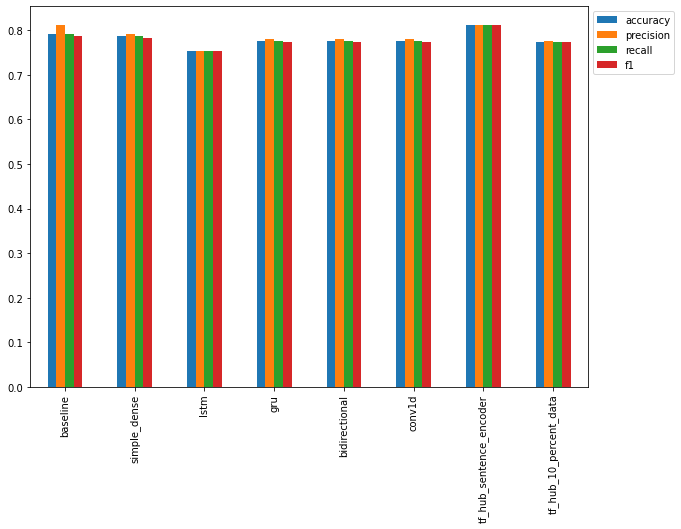

In [125]:
# Plot and compare all of the model results
all_model_results.plot(kind="bar", figsize=(10, 7)).legend(bbox_to_anchor=(1.0, 1.0));

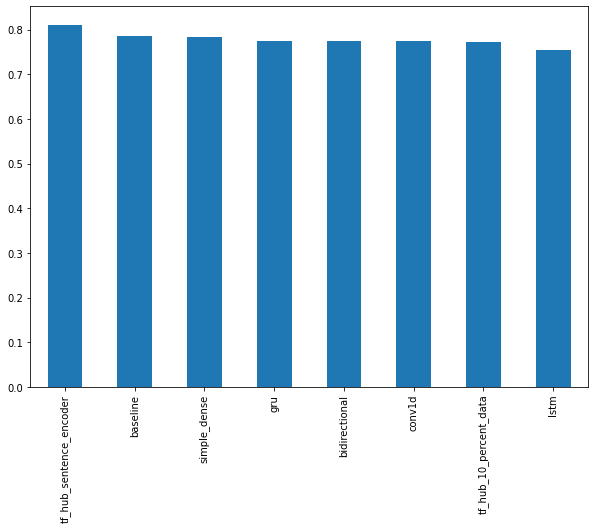

In [126]:
# Based on f1 score 

all_model_results.sort_values("f1", ascending=False)["f1"].plot(kind="bar", figsize=(10, 7));

# Ensemble - Model Stacking 

> We find the baseline is performing very close to depp learning model . This leads us to think for stacking the model 

```Model Stacking```

>  😕 Why dont we combine the baseline with some other model to improve the performance ?

-----
#### Lets combine baseline with LSTM model (model_2) and model_6
-----

Refer :  

Since we're working with a classification problem, there are a few of ways we can combine our models:

Averaging - Take the output prediction probabilities of each model for each sample, combine them and then average them.
Majority vote (mode) - Make class predictions with each of your models on all samples, the predicted class is the one in majority. For example, if three different models predict [1, 0, 1] respectively, the majority class is 1, therefore, that would be the predicted label.
Model stacking - Take the outputs of each of your chosen models and use them as inputs to another model.

> 📖 Resource: The above methods for model stacking/ensembling were adapted from Chapter 6 of the Machine Learning Engineering Book by Andriy Burkov. If you're looking to enter the field of machine learning engineering, not only building models but production-scale machine learning systems, I'd highly recommend reading it in its entirety.

In [128]:
# Stacked model = Average of ( baseline model , model 6 , model 2)
# Get mean pred probs for 3 models
import numpy as np
baseline_pred_probs = np.max(model_0.predict_proba(val_sentences), axis=1) # get the prediction probabilities from baseline model
combined_pred_probs = baseline_pred_probs + tf.squeeze(model_2_pred_probs, axis=1) + tf.squeeze(model_6_pred_probs)
combined_preds = tf.round(combined_pred_probs/3) # average and round the prediction probabilities to get prediction classes
combined_preds[:20]

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1.], dtype=float32)>

In [129]:
# Calculate results from averaging the prediction probabilities
ensemble_results = calculate_results(val_labels, combined_preds)
ensemble_results

{'accuracy': 77.69028871391076,
 'precision': 0.7784362275132898,
 'recall': 0.7769028871391076,
 'f1': 0.7772361788109818}

In [130]:
# Add our combined model's results to the results DataFrame
all_model_results.loc["ensemble_results"] = ensemble_results


In [131]:
# Convert the accuracy to the same scale as the rest of the results
all_model_results.loc["ensemble_results"]["accuracy"] = all_model_results.loc["ensemble_results"]["accuracy"]/100

In [132]:
all_model_results

,accuracy,precision,recall,f1
baseline,0.792651,0.811139,0.792651,0.786219
simple_dense,0.786089,0.792092,0.786089,0.782703
lstm,0.754593,0.754285,0.754593,0.754375
gru,0.776903,0.780589,0.776903,0.774064
bidirectional,0.776903,0.780589,0.776903,0.774064
conv1d,0.776903,0.780589,0.776903,0.774064
tf_hub_sentence_encoder,0.812336,0.812924,0.812336,0.811431
tf_hub_10_percent_data,0.774278,0.774900,0.774278,0.772825
ensemble_results,0.776903,0.778436,0.776903,0.777236


 🤔 **Note** :Ensemble results doesnt make much improvemetn as we thought . This tell us that the with the train data this is the best we can do

# Tensor Board 

## Viewing in TensorBoard

In [133]:
# # View tensorboard logs of transfer learning modelling experiments (should be 4 models)
# Upload TensorBoard dev records
# !tensorboard dev upload --logdir ./model_logs \
#   --name "First deep model on text data" \
#   --description "Trying a dense model with an embedding layer" \
#   --one_shot # exits the uploader when upload has finished

In [134]:
# If you need to remove previous experiments, you can do so using the following command
# !tensorboard dev delete --experiment_id EXPERIMENT_ID_TO_DELETE

# Save and Load our model 

In [135]:
# Save TF Hub Sentence Encoder model to HDF5 format
model_6.save("model_6.h5")

If you save a model as a `HDF5`, when loading it back in, you need to let [TensorFlow know about any custom objects you've used](https://www.tensorflow.org/tutorials/keras/save_and_load#saving_custom_objects) (e.g. components which aren't built from pure TensorFlow, such as TensorFlow Hub components).

In [136]:
# Load model with custom Hub Layer (required with HDF5 format)
loaded_model_6 = tf.keras.models.load_model("model_6.h5", 
                                            custom_objects={"KerasLayer": hub.KerasLayer})

In [137]:
# How does our loaded model perform?
loaded_model_6.evaluate(val_sentences, val_labels)

24/24 [==============================] - 1s 13ms/step - loss: 0.4296 - accuracy: 0.8123


[0.4295514225959778, 0.8123359680175781]

Calling the `save()` method on our target model and passing it a filepath allows us to save our model in the `SavedModel` format. 

In [138]:
# Save TF Hub Sentence Encoder model to SavedModel format (default)
model_6.save("model_6_SavedModel_format")

If you use SavedModel format (default), you can reload your model without specifying custom objects using the [`tensorflow.keras.models.load_model()`](https://www.tensorflow.org/tutorials/keras/save_and_load) function.

In [139]:
# Load TF Hub Sentence Encoder SavedModel
loaded_model_6_SavedModel = tf.keras.models.load_model("model_6_SavedModel_format")

In [140]:
# Evaluate loaded SavedModel format
loaded_model_6_SavedModel.evaluate(val_sentences, val_labels)

24/24 [==============================] - 1s 12ms/step - loss: 0.4296 - accuracy: 0.8123


[0.4295514225959778, 0.8123359680175781]

In [149]:
!sudo du -h --max-depth=1 .

108K	./.config
989M	./model_6_SavedModel_format
3.0M	./model_logs
12K	./__pycache__
55M	./sample_data
2.0G	.


``` HDF5 model : 981M	model_6.h5    :    SavedModel : 989M	./model_6_SavedModel_format```

# Active Learning - Learning from the results of the model 

* Finding the most wrong examples 

* We know that even after stacking the models , we didnt realize a benefit out of it. 

* Lets inspect the data why we are mot having improvement in stacking 

* One of the best ways to inspect your data is to sort your model's predictions and find the samples it got most wrong, meaning, ```what predictions had a high prediction probability but turned out to be wrong```.

* To make things visual, let's take our best performing model's prediction probabilities and classes along with the validation samples (text and ground truth labels) and combine them in a pandas DataFrame.

* If our best model still isn't perfect, what examples is it getting wrong? 
* Which ones are the *most* wrong?
* Are there some labels which are wrong? E.g. the model gets it right but the ground truth label doesn't reflect this




In [150]:
# Create dataframe with validation sentences and best performing model predictions
val_df = pd.DataFrame({"text": val_sentences,
                       "target": val_labels,
                       "pred": model_6_preds,
                       "pred_prob": tf.squeeze(model_6_pred_probs)})
val_df.head()

,text,target,pred,pred_prob
0,DFR EP016 Monthly Meltdown - On Dnbheaven 2015...,0,0.0,0.267748
1,FedEx no longer to transport bioterror germs i...,0,1.0,0.825955
2,Gunmen kill four in El Salvador bus attack: Su...,1,1.0,0.990544
3,@camilacabello97 Internally and externally scr...,1,0.0,0.244550
4,Radiation emergency #preparedness starts with ...,1,1.0,0.751801


In [157]:
# We will try to find the FALSE POSITIVE , where actually there is no disaster but model predicted as DISASTER 

false_preds = val_df.loc[val_df['pred']!=val_df['target']].sort_values(by='pred_prob',ascending=False)
false_preds[:5]

,text,target,pred,pred_prob
31,? High Skies - Burning Buildings ? http://t.co...,0,1.0,0.936503
759,FedEx will no longer transport bioterror patho...,0,1.0,0.912790
628,@noah_anyname That's where the concentration c...,0,1.0,0.872823
49,@madonnamking RSPCA site multiple 7 story high...,0,1.0,0.855076
393,@SonofLiberty357 all illuminated by the bright...,0,1.0,0.847938


In [162]:
# Lets get deeep diveeeeee for top 10 false preds --> FALSE PSITIVE

for each in false_preds[:10].itertuples():
  _, text, target , pred, prob = each
  print(f"Target: {target}, Pred: {int(pred)}, Prob: {round(prob,4)}")
  print(f"Text:\n{text}\n")
  print("----\n")



Target: 0, Pred: 1, Prob: 0.9365
Text:
? High Skies - Burning Buildings ? http://t.co/uVq41i3Kx2 #nowplaying

----

Target: 0, Pred: 1, Prob: 0.9128
Text:
FedEx will no longer transport bioterror pathogens in wake of anthrax lab mishaps http://t.co/lHpgxc4b8J

----

Target: 0, Pred: 1, Prob: 0.8728
Text:
@noah_anyname That's where the concentration camps and mass murder come in. 
 
EVERY. FUCKING. TIME.

----

Target: 0, Pred: 1, Prob: 0.8551
Text:
@madonnamking RSPCA site multiple 7 story high rise buildings next to low density character residential in an area that floods

----

Target: 0, Pred: 1, Prob: 0.8479
Text:
@SonofLiberty357 all illuminated by the brightly burning buildings all around the town!

----

Target: 0, Pred: 1, Prob: 0.8349
Text:
[55436] 1950 LIONEL TRAINS SMOKE LOCOMOTIVES WITH MAGNE-TRACTION INSTRUCTIONS http://t.co/xEZBs3sq0y http://t.co/C2x0QoKGlY

----

Target: 0, Pred: 1, Prob: 0.826
Text:
FedEx no longer to transport bioterror germs in wake of anthrax lab mis

In [169]:
# Check the most wrong false negatives (model predicted 0 when should've predict 1)
false_n_preds = val_df.loc[(val_df['pred']==0) & (val_df['target']==1)].sort_values(by='pred_prob',ascending=False)
false_n_preds[:5]


,text,target,pred,pred_prob
338,I was on my way to Gary but all the Chicago en...,1,0.0,0.491907
143,When ur friend and u are talking about forest ...,1,0.0,0.491786
75,DireTube Information ÛÒ Egypt Cyprus and Gree...,1,0.0,0.490084
541,@Dirk_NoMissSki yea but if someone faints why ...,1,0.0,0.486341
42,Nearly had a heart attack just now; loud bang ...,1,0.0,0.485841


In [170]:

for row in false_n_preds[:10].itertuples():
  _, text, target, pred, prob = row
  print(f"Target: {target}, Pred: {int(pred)}, Prob: {prob}")
  print(f"Text:\n{text}\n")
  print("----\n")

Target: 1, Pred: 0, Prob: 0.4919065535068512
Text:
I was on my way to Gary but all the Chicago entrances was closed due to a bridge collapsed ?????? I hope they let us through tomorrow

----

Target: 1, Pred: 0, Prob: 0.4917859435081482
Text:
When ur friend and u are talking about forest fires in a forest and he tells u to drop ur mix tape out there... #straightfire

----

Target: 1, Pred: 0, Prob: 0.4900835454463959
Text:
DireTube Information ÛÒ Egypt Cyprus and Greece agreed to fightåÊterrorism http://t.co/V6IjxCCD2I http://t.co/YSXhFWMGOD

----

Target: 1, Pred: 0, Prob: 0.48634105920791626
Text:
@Dirk_NoMissSki yea but if someone faints why are they panicking?.. thats basic stuff ??

----

Target: 1, Pred: 0, Prob: 0.4858410060405731
Text:
Nearly had a heart attack just now; loud bang against window next to meÛ_turns out it was two birds flying into the glass.

----

Target: 1, Pred: 0, Prob: 0.4513198733329773
Text:
I moved to England five years ago today. What a whirlwind of ti

In [ ]:
# We could see some of the labels are misclassified (Target is wrong)  in the input data itself. 
# We could update that and realise improvement in performnace

## Making predictions on the test dataset

Alright we've seen how our model's perform on the validation set.

But how about the test dataset?

We don't have labels for the test dataset so we're going to have to make some predictions and inspect them for ourselves.

Let's write some code to make predictions on random samples from the test dataset and visualize them.

In [172]:
# Making predictions on the test dataset
test_sentences = test_df["text"].to_list()
test_samples = random.sample(test_sentences, 3)
for test_sample in test_samples:
  pred_prob = tf.squeeze(model_6.predict([test_sample])) # has to be list
  pred = tf.round(pred_prob)
  print(f"Pred: {int(pred)}, Prob: {pred_prob}")
  print(f"Text:\n{test_sample}\n")
  print("----\n")

Pred: 1, Prob: 0.9146112203598022
Text:
Cop pulls drunk driver to safety SECONDS before his car is hit by train. http://t.co/cTL5xzIHxAåÊ http://t.co/1kDOZTD9mv via @ViralSpell

----

Pred: 1, Prob: 0.8192832469940186
Text:
incident with injury:I-495  inner loop Exit 31 - MD 97/Georgia Ave Silver Spring

----

Pred: 0, Prob: 0.16259437799453735
Text:
[Chaos dancing in the streets | Why did God order obliteration of ancient Canaanites?] http://t.co/P7DLX1wFmC via @Michael_0000

----



## Predicting on Tweets from the wild

How about we find some Tweets and use our model to predict whether or not they're about a diaster or not?

To start, let's take one of my own [Tweets on living life like an ensemble model](https://twitter.com/mrdbourke/status/1313649328351662082). 

In [195]:
# Turn Tweet into string
sample_tweet = "We maintain the garden every day"

Now we'll write a small function to take a model and an example sentence and return a prediction.

In [180]:
def predict_on_sentence(model, sentence):
  """
  Uses model to make a prediction on sentence.

  Returns the sentence, the predicted label and the prediction probability.
  """
  pred_prob = model.predict([sentence])
  pred_label = tf.squeeze(tf.round(pred_prob)).numpy()
  print(f"Pred: {pred_label}", "(real disaster)" if pred_label > 0 else "(not real disaster)", f"Prob: {pred_prob[0][0]}")
  print(f"Text:\n{sentence}")

In [196]:
# Make a prediction on Tweet from the wild
predict_on_sentence(model=model_6, # use the USE model
                    sentence=sample_tweet)

Pred: 0.0 (not real disaster) Prob: 0.049209654331207275
Text:
We maintain the garden every day


Woohoo! Our model predicted correctly. My Tweet wasn't about a diaster.

How about we find a few Tweets about actual diasters?

Such as the following two Tweets about the 2020 Beirut explosions.

In [197]:
# Source - https://twitter.com/BeirutCityGuide/status/1290696551376007168
beirut_tweet_1 = "Reports that the smoke in Beirut sky contains nitric acid, which is toxic. Please share and refrain from stepping outside unless urgent. #Lebanon"

# Source - https://twitter.com/BeirutCityGuide/status/1290773498743476224
beirut_tweet_2 = "#Beirut declared a “devastated city”, two-week state of emergency officially declared. #Lebanon"

In [198]:
# Predict on diaster Tweet 1
predict_on_sentence(model=model_6, 
                    sentence=beirut_tweet_1)

Pred: 1.0 (real disaster) Prob: 0.9675908088684082
Text:
Reports that the smoke in Beirut sky contains nitric acid, which is toxic. Please share and refrain from stepping outside unless urgent. #Lebanon


In [199]:
# Predict on diaster Tweet 2
predict_on_sentence(model=model_6, 
                    sentence=beirut_tweet_2)

Pred: 1.0 (real disaster) Prob: 0.9809672832489014
Text:
#Beirut declared a “devastated city”, two-week state of emergency officially declared. #Lebanon


Looks like our model is performing as expected, predicting both of the diaster Tweets as actual diasters.

> 🔑 **Note:** The above examples are cherry-picked and are cases where you'd expect a model to function at high performance. For actual production systems, you'll want to continaully perform tests to see how your model is performing.

# The speed/score tradeoff

> We choose the best model if we are not concerned about timing it takes . But all real life applications are not so. We may have to run the model in less computing power environments like mobile devices, in that case uit will be daunting from end user to wait long for the predictions. 

> When the number of test is also huge , thing will get more dirty. Hence we need to find a decent model , which compromisesd both time and performance.

One of the final tests we're going to do is to find the speed/score tradeoffs between our best model and baseline model.

Why is this important?

Although it can be tempting to just choose the best performing model you find through experimentation, this model might not actually work in a production setting.

Put it this way, imagine you're Twitter and receive 1 million Tweets per hour (this is a made up number, the actual number is much higher). And you're trying to build a diaster detection system to read Tweets and alert authorities with details about a diaster in close to real-time.

Compute power isn't free so you're limited to a single compute machine for the project. On that machine, one of your models makes 10,000 predictions per second at 80% accuracy where as another one of your models (a larger model) makes 100 predictions per second at 85% accuracy.

Which model do you choose?

Is the second model's performance boost worth missing out on the extra capacity?

Of course, there are many options you could try here, such as sending as many Tweets as possible to the first model and then sending the ones which the model is least certain of to the second model. 

The point here is to illustrate the best model you find through experimentation, might not be the model you end up using in production.

To make this more concrete, let's write a function to take a model and a number of samples and time how long the given model takes to make predictions on those samples.

In [200]:
# Calculate the time of predictions
import time
def pred_timer(model, samples):
  """
  Times how long a model takes to make predictions on samples.
  
  Args:
  ----
  model = a trained model
  sample = a list of samples

  Returns:
  ----
  total_time = total elapsed time for model to make predictions on samples
  time_per_pred = time in seconds per single sample
  """
  start_time = time.perf_counter() # get start time
  model.predict(samples) # make predictions
  end_time = time.perf_counter() # get finish time
  total_time = end_time-start_time # calculate how long predictions took to make
  time_per_pred = total_time/len(val_sentences) # find prediction time per sample
  return total_time, time_per_pred

## Comparing baseline Vs model_6

Looking good!

Now let's use our `pred_timer()` function to evaluate the prediction times of our best performing model (`model_6`) and our baseline model (`model_0`).

In [201]:
# Calculate TF Hub Sentence Encoder prediction times
model_6_total_pred_time, model_6_time_per_pred = pred_timer(model_6, val_sentences)
model_6_total_pred_time, model_6_time_per_pred

(0.7460596880000594, 0.0009790809553806555)

In [202]:
# Calculate Naive Bayes prediction times
baseline_total_pred_time, baseline_time_per_pred = pred_timer(model_0, val_sentences)
baseline_total_pred_time, baseline_time_per_pred

(0.10600900999997975, 0.00013911943569551148)

It seems with our current hardware (in my case, I'm using a Google Colab notebook) our best performing model takes over 7x the time to make predictions as our baseline model.

Is that extra prediction time worth it?

Let's compare time per prediction versus our model's F1-scores.

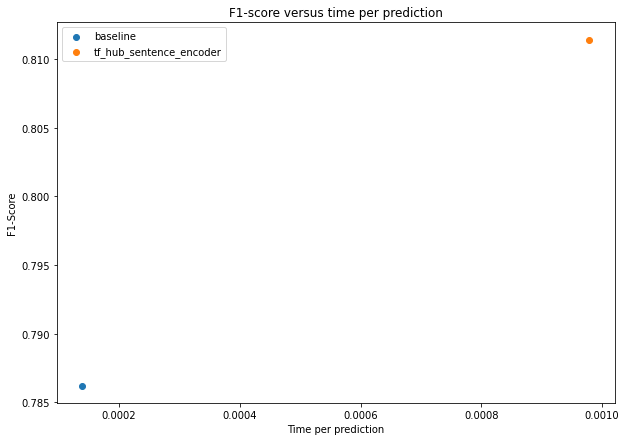

In [203]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.scatter(baseline_time_per_pred, baseline_results["f1"], label="baseline")
plt.scatter(model_6_time_per_pred, model_6_results["f1"], label="tf_hub_sentence_encoder")
plt.legend()
plt.title("F1-score versus time per prediction")
plt.xlabel("Time per prediction")
plt.ylabel("F1-Score");

![](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/08-ideal-performance-speed-of-pred-tradeoff-highlighted.png)
*Ideal position for speed and performance tradeoff model (fast predictions with great results).*

Of course, the ideal position for each of these dots is to be in the top left of the plot (low time per prediction, high F1-score). 

In our case, there's a clear tradeoff for time per prediction and performance. Our best performing model takes an order of magnitude longer per prediction but only results in a few F1-score point increase.

This kind of tradeoff is something you'll need to keep in mind when incorporating machine learning models into your own applications.